In [1]:
# Import libraries
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [2]:
# make a path to project folder
path = r'C:\Users\egrnw\anaconda3\03-07-2025 Instacart Basket Analysis'

In [3]:
#Import orders_products_merge
ords_prods_merge = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'ords_prods_merged_grouped.pkl'))

<Axes: xlabel='order_dow'>

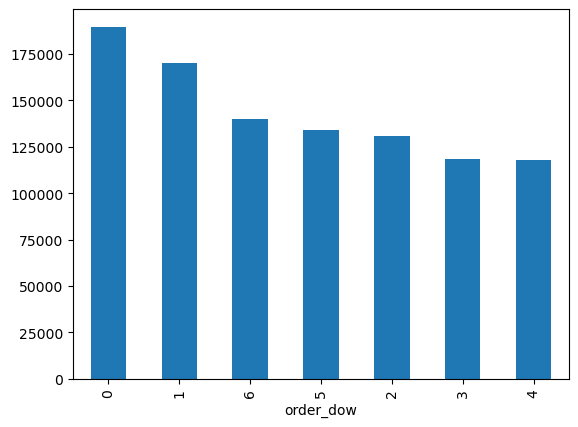

In [4]:
ords_prods_merge['order_dow'].value_counts().plot.bar()

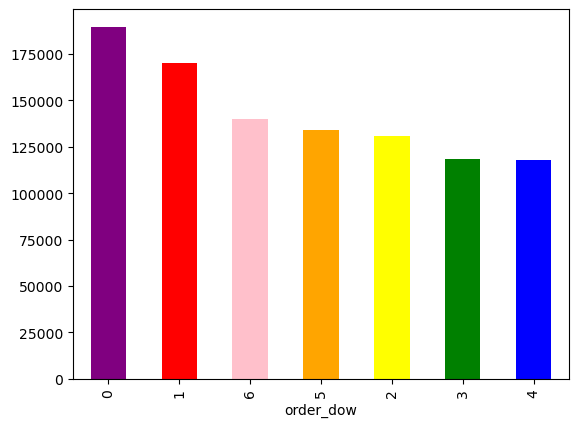

In [5]:
bar = ords_prods_merge['order_dow'].value_counts().plot.bar(color =['purple', 'red', 'pink', 'orange', 'yellow', 'green', 'blue'])

In [6]:
bar.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_orders_dow.png'))

<Axes: ylabel='Frequency'>

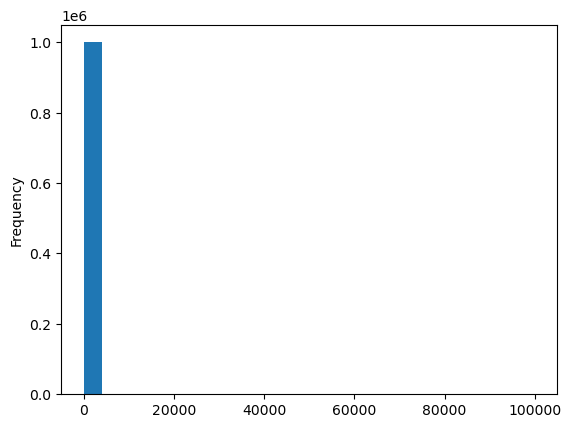

In [7]:
ords_prods_merge['prices'].plot.hist(bins = 25)

In [8]:
ords_prods_merge['prices'].describe()

count    1000000.000000
mean          11.396794
std          425.994349
min            1.000000
25%            4.200000
50%            7.400000
75%           11.300000
max        99999.000000
Name: prices, dtype: float64

<Axes: xlabel='prices', ylabel='prices'>

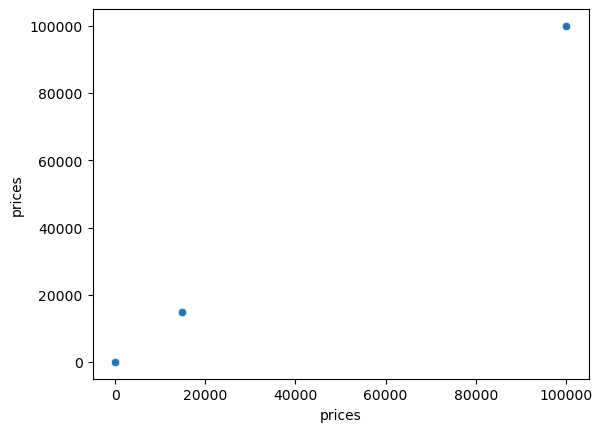

In [9]:
sns.scatterplot(x = 'prices', y = 'prices',data = ords_prods_merge)

In [10]:
ords_prods_merge.loc[ords_prods_merge['prices'] > 100]

,Unnamed: 0,Unnamed: 0_x,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order,product_id,...,merge_indicator,price_range,price_range_loc,busiest_period_of_day,max_order,loyalty_flag,avg_product_price,spending_flag,median_days_between_orders,order_frequency_flag
1576,1576,171,912404,17,prior,12,2,14,5.0,21553,...,both,High range,High-range product,Fewest Orders,40,Regular customer,108.648299,High spender,5.0,Frequent customer
1638,1638,181,603376,17,prior,22,6,16,4.0,21553,...,both,High range,High-range product,Fewest Orders,40,Regular customer,108.648299,High spender,5.0,Frequent customer
16522,16522,1944,3264360,135,prior,2,2,21,13.0,21553,...,both,High range,High-range product,Fewest Orders,4,New customer,1154.792308,High spender,12.0,Regular customer
16528,16528,1945,892534,135,prior,3,0,8,12.0,21553,...,both,High range,High-range product,Fewest Orders,4,New customer,1154.792308,High spender,12.0,Regular customer
53672,53672,5708,229704,342,prior,8,1,19,30.0,21553,...,both,High range,High-range product,Fewest Orders,16,Regular customer,114.426619,High spender,23.0,Non-frequent customer
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
958974,958974,102658,840159,6217,prior,13,1,11,15.0,21553,...,both,High range,High-range product,Fewest Orders,23,Regular customer,391.192949,High spender,14.0,Regular customer
959020,959020,102665,1235750,6217,prior,20,5,9,11.0,21553,...,both,High range,High-range product,Fewest Orders,23,Regular customer,391.192949,High spender,14.0,Regular customer
960274,960274,102737,40712,6221,prior,5,0,15,8.0,21553,...,both,High range,High-range product,Fewest Orders,15,Regular customer,163.051832,High spender,15.0,Regular customer
960348,960348,102742,2567369,6221,prior,10,2,17,17.0,21553,...,both,High range,High-range product,Fewest Orders,15,Regular customer,163.051832,High spender,15.0,Regular customer


In [11]:
ords_prods_merge.loc[ords_prods_merge['prices'] >100, 'prices'] = np.nan

In [12]:
ords_prods_merge['prices'].max()

25.0

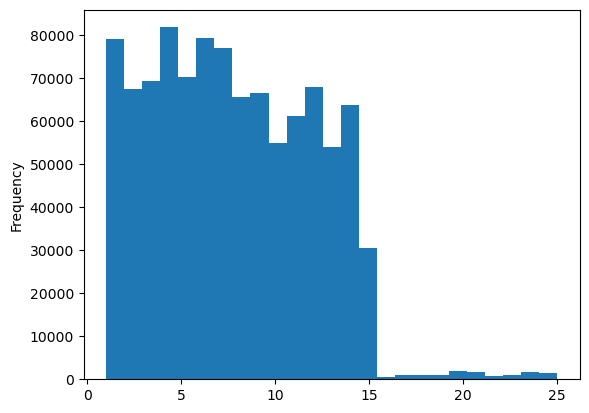

In [13]:
hist = ords_prods_merge['prices'].plot.hist(bins = 25)

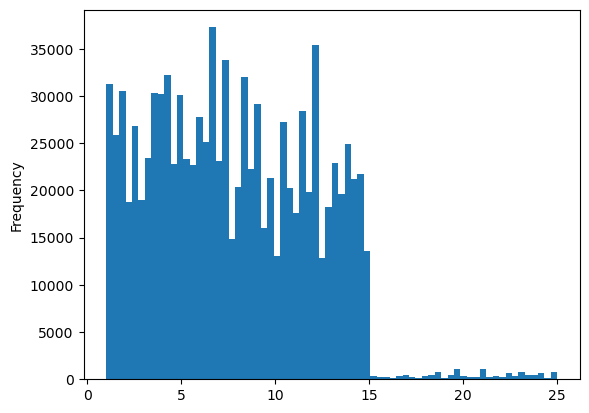

In [14]:
hist_2 = ords_prods_merge['prices'].plot.hist(bins = 70)

In [15]:
hist.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'hist_prices.png'))

In [16]:
df = ords_prods_merge[:2000000]

In [17]:
np.random.seed(4)
dev = np.random.rand(len(ords_prods_merge)) <= 0.7

In [18]:
dev

array([False,  True, False, ..., False,  True, False])

In [19]:
# Create a list holding True/False values to the test np.random.rant() <= 0.7

dev = np.random.rand(len(ords_prods_merge)) <= 0.7

In [20]:
# Store 70% of sample in the dataframe big

big = ords_prods_merge[dev]

In [21]:
# Store 30% of sample in the dataframe small

small = ords_prods_merge[~dev]

In [22]:
len(ords_prods_merge)

1000000

In [23]:
len(big) + len(small)

1000000

In [25]:
df_2 = small[['order_dow','prices']]

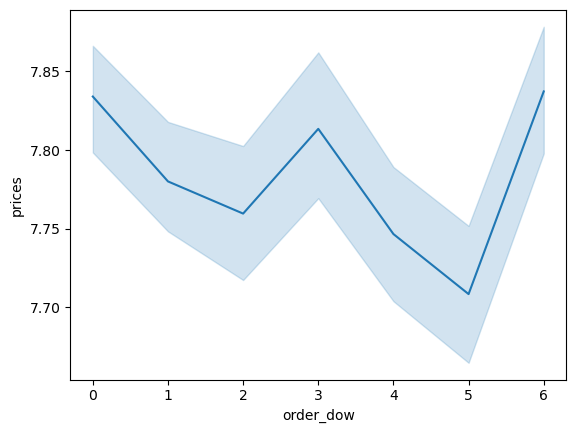

In [27]:
line = sns.lineplot(data = df_2, x = 'order_dow',y = 'prices')